Project Assignment #1
In this project assignment, we are going to use the "Traffic Tickets Issued: Four Year Window" data set available from the Data.Gov website (https://catalog.data.gov/dataset?groups=local&organization_type=State+Government#topic=local_navigation).

The focus of the analysis will be oriented towards the following attributes within the cities of :

1) Violation Year

2) Violation Month

3) Violation Day of Week

4) Age at Violation

5) Gender

There are a few objectives you need to accomplish:

1) Examine the above-mentioned attributes in the data set for any missing values

2) If there are any missing values, treat the misisng values. Here is a article that provides insight into the common methods to deal with missing values:

https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce

Please the tips provided in the article to deal with missing values

3) Compute summary statistics for the "age at violation" for Males and Females respectively

a) Mean, b) Median, c) Standard Deviation, d) Variance

4) Construct a Boxplot to surface the 25%, 50% and 75% percentiles of "Age at Violation" by Gender

5) Construct Histograms to showcase the following:

a) Count of Violations by Day of Week

b) Count of Violations by Month

c) Count of Violations by Gender

6) Hone in on the data set for the Year 2015. Does the 'Age at Violations' and the total number of violations vary together? Construct a scatter plot that plots the 'Violation at Age' v/s the Total # Of Violation'. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance. Perform this analysis for both the genders.

7) Compute the Correlation Coefficient between the 2 variable i.e. 'Violation at Age' and the 'Total # Of Violations'. Perform this analysis for both the genders.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [0]:
# run only once!

!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# file_id: string (id of the file you want to download)
# title: string (name which you want to give to the file being downloaded)

    
def upload_file_to_drive(file, title):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    export = drive.CreateFile({'title':title})  
    export.SetContentFile(file)
    export.Upload()

    return export['id']  

def download_file_from_drive(file_id, title):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
  
    download = drive.CreateFile({'id': file_id})
    download.GetContentFile(title)


In [4]:
# run only once!

!wget https://data.ny.gov/api/views/q4hy-kbtf/rows.csv -O violations.csv

--2018-05-01 20:36:16--  https://data.ny.gov/api/views/q4hy-kbtf/rows.csv
Resolving data.ny.gov (data.ny.gov)... 52.206.140.199
Connecting to data.ny.gov (data.ny.gov)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘violations.csv’

violations.csv          [           <=>      ]   1.45G   108MB/s    in 12s     

Last-modified header invalid -- time-stamp ignored.
2018-05-01 20:36:28 (128 MB/s) - ‘violations.csv’ saved [1558223985]



In [0]:
# run only once!

file_id = upload_file_to_drive('violations.csv', 'violations_uploaded.csv')
download_file_from_drive(file_id, 'violations_downloaded.csv')

In [0]:
data = pd.read_csv('violations_downloaded.csv')

## Examine/Treat Data

In [34]:
print(data.shape)
data.head()

(14275009, 11)


,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source
0,5091G,UNLICENSED GT 60DAYS,2015,1,THURSDAY,55.0,M,NEW YORK,NYC POLICE DEPT,QUEENS SOUTH TVB,TVB
1,376,LIGHTING-VARIOUS VIO,2015,1,THURSDAY,24.0,M,NEW YORK,NYC POLICE DEPT,QUEENS SOUTH TVB,TVB
2,1160C,IMPROPER LEFT TURN ON ONE-WAY RDWY,2015,2,MONDAY,62.0,M,NEW YORK,NYC POLICE DEPT,MANHATTAN SOUTH TVB,TVB
3,5091G,UNLICENSED GT 60DAYS,2015,9,THURSDAY,33.0,F,MICHIGAN,TRIBOROUGH BRIDGE TUNNEL AUTH,QUEENS SOUTH TVB,TVB
4,5091G,UNLICENSED GT 60DAYS,2015,5,SATURDAY,45.0,M,UNKNOWN,NYC POLICE DEPT,BROOKLYN SOUTH TVB,TVB


In [35]:
data = data[['Violation Year', 'Violation Month', 'Violation Day of Week', 'Age at Violation', 'Gender']]
data.head()

,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender
0,2015,1,THURSDAY,55.0,M
1,2015,1,THURSDAY,24.0,M
2,2015,2,MONDAY,62.0,M
3,2015,9,THURSDAY,33.0,F
4,2015,5,SATURDAY,45.0,M


In [36]:
data.isnull().any()

Violation Year           False
Violation Month          False
Violation Day of Week    False
Age at Violation          True
Gender                   False
dtype: bool

In [37]:
data['Age at Violation'] = data['Age at Violation'].fillna(data['Age at Violation'].mode()[0])
data.isnull().any()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Violation Year           False
Violation Month          False
Violation Day of Week    False
Age at Violation         False
Gender                   False
dtype: bool

## Summary Statistics

In [0]:
males = data[data['Gender']=='M']
males_summary = males.describe()
males_summary = males_summary.loc[['mean', '50%', 'std']]

In [0]:
males_variance = np.power(males_summary.loc[['std']], 2)
males_summary = males_summary.append(males_variance, ignore_index=True)

In [40]:
males_summary = males_summary.rename({0: 'mean', 1: 'median', 2: 'std', 3: 'variance'})
males_summary

,Violation Year,Violation Month,Age at Violation
mean,2014.491902,6.346118,37.006002
median,2014.000000,6.000000,34.000000
std,1.120125,3.362163,13.849183
variance,1.254681,11.304139,191.799870


In [41]:
females = data[data['Gender']=='F']
females_summary = females.describe()
females_summary = females_summary.loc[['mean', '50%', 'std']]
females_variance = np.power(females_summary.loc[['std']], 2)
females_summary = females_summary.append(females_variance, ignore_index=True)
females_summary = females_summary.rename({0: 'mean', 1: 'median', 2: 'std', 3: 'variance'})
females_summary

,Violation Year,Violation Month,Age at Violation
mean,2014.498879,6.366151,36.268697
median,2014.000000,6.000000,33.000000
std,1.120372,3.377081,13.512275
variance,1.255234,11.404674,182.581583


## Plots

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


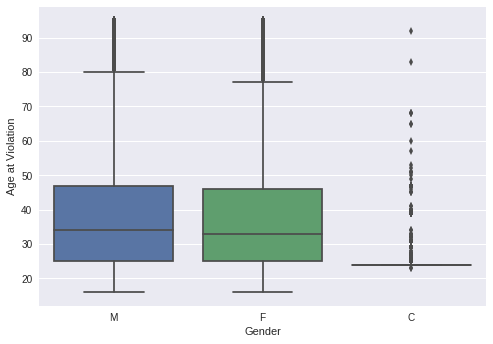

In [42]:
ax = sns.boxplot(data['Gender'], data['Age at Violation']);

In [43]:
count_byday = pd.DataFrame(data.groupby('Violation Day of Week').count()[['Violation Year']].reset_index())
count_byday.columns = ['Day of Week', 'Violations']
count_byday

,Day of Week,Violations
0,FRIDAY,2230294
1,MONDAY,1886748
2,SATURDAY,1977429
3,SUNDAY,1688825
4,THURSDAY,2175701
5,TUESDAY,2132309
6,WEDNESDAY,2183703


In [0]:
count_bymonth = pd.DataFrame(data.groupby('Violation Month').count()[['Violation Year']].reset_index())
count_bymonth.columns = ['Month', 'Violations']

count_bygender = pd.DataFrame(data.groupby('Gender').count()[['Violation Year']].reset_index())
count_bygender.columns = ['Gender', 'Violations']

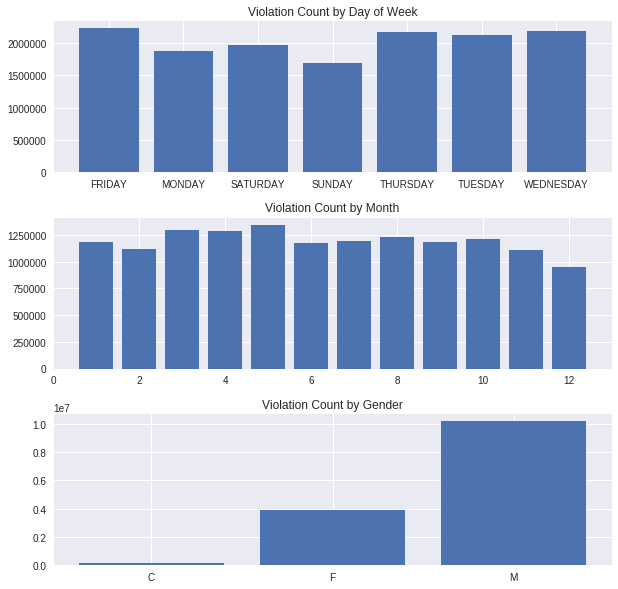

In [45]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.3)

axs[0].bar(count_byday['Day of Week'], count_byday['Violations'])
axs[0].set(title='Violation Count by Day of Week')

axs[1].bar(count_bymonth['Month'], count_bymonth['Violations'])
axs[1].set(title='Violation Count by Month')

axs[2].bar(count_bygender['Gender'], count_bygender['Violations'])
axs[2].set(title='Violation Count by Gender');

## Covariance and Correlation Analysis

As there is no `Total # of Violations` feature in the dataset, I will compute this aggregate measure, grouping by `Age at Violation`. Furthermore, I will ignore the `"C"` gender, as there are relatively few entries with this feature, as demonstrated by the histogram above.

In [46]:
data_2015 = data[data['Violation Year'] == 2015]
data_2015.head()

,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender
0,2015,1,THURSDAY,55.0,M
1,2015,1,THURSDAY,24.0,M
2,2015,2,MONDAY,62.0,M
3,2015,9,THURSDAY,33.0,F
4,2015,5,SATURDAY,45.0,M


In [0]:
male_2015 = data_2015[data_2015['Gender']=='M']
female_2015 = data_2015[data_2015['Gender']=='F']

In [0]:
male_byage = pd.DataFrame(male_2015.groupby('Age at Violation').count()[['Violation Year']].reset_index())
male_byage.columns = ['Age', 'Total # of Violations']

In [0]:
female_byage = pd.DataFrame(female_2015.groupby('Age at Violation').count()[['Violation Year']].reset_index())
female_byage.columns = ['Age', 'Total # of Violations']

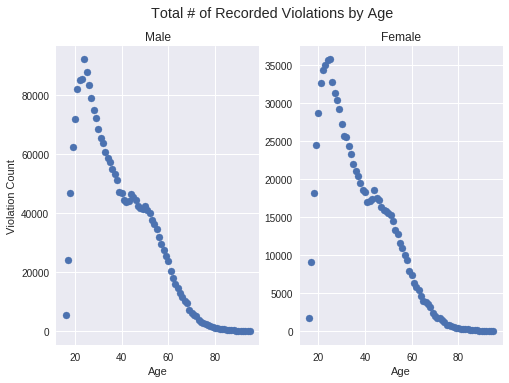

In [51]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Total # of Recorded Violations by Age')

axs[0].scatter(male_byage['Age'], male_byage['Total # of Violations'])
axs[0].set(title='Male', xlabel='Age', ylabel='Violation Count')

axs[1].scatter(female_byage['Age'], female_byage['Total # of Violations'])
axs[1].set(title='Female', xlabel='Age');

`Total # of Violations` appears to be negatively correlated with `Age` for the most part, peaking somewhere between 20 and 30 for both genders. As such, both the covariance, and the correlation coefficient (which is the covariance scaled down by the product of the individual variances) will be negative.

In [52]:
male_M, female_M = (male_byage[['Total # of Violations', 'Age']].as_matrix(),
                    female_byage[['Total # of Violations', 'Age']].as_matrix())

male_cov, female_cov = np.cov(male_M.T)[0,1], np.cov(female_M.T)[0,1]
male_corr, female_corr = np.corrcoef(male_M.T)[0,1], np.corrcoef(female_M.T)[0,1]

cov = pd.DataFrame([male_cov, female_cov], columns=['Covariance'], index=['Male Violations with Age', 'Female Violations with Age'])
corr = pd.DataFrame([male_corr, female_corr], columns=['Correlation Coefficient'], index=['Male Violations with Age', 'Female Violations with Age'])

cov.join(corr)

,Covariance,Correlation Coefficient
Male Violations with Age,-587065.208861,-0.891185
Female Violations with Age,-232887.512658,-0.884907
